In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv(r"D:\down\breast+cancer\breast-cancer.data")

In [3]:
df.head()

,Class,age,manapause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,no-recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
2,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
3,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
4,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no


In [4]:
df.duplicated().sum()

14

In [5]:
df.drop_duplicates(inplace=True)

In [6]:
df.duplicated().sum()

0

In [7]:
df.isnull().sum()

Class          0
age            0
manapause      0
tumor-size     0
inv-nodes      0
node-caps      0
deg-malig      0
breast         0
breast-quad    0
irradiat       0
dtype: int64

In [8]:
df.replace("?",pd.NA,inplace=True)

In [9]:
df.dropna(inplace=True)

In [10]:
df.isnull().sum()

Class          0
age            0
manapause      0
tumor-size     0
inv-nodes      0
node-caps      0
deg-malig      0
breast         0
breast-quad    0
irradiat       0
dtype: int64

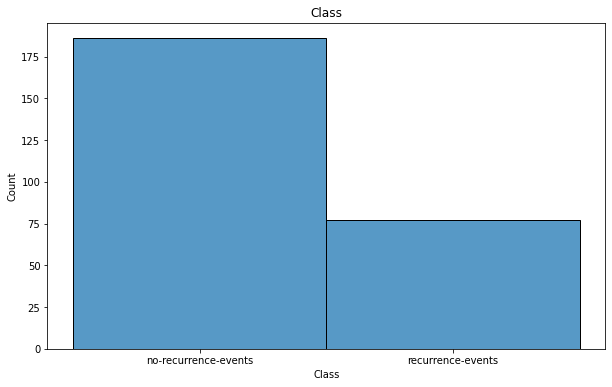

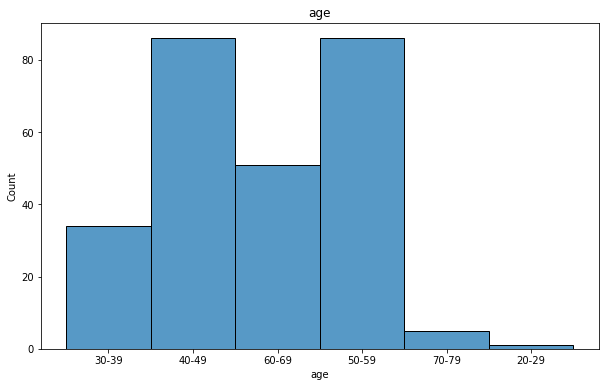

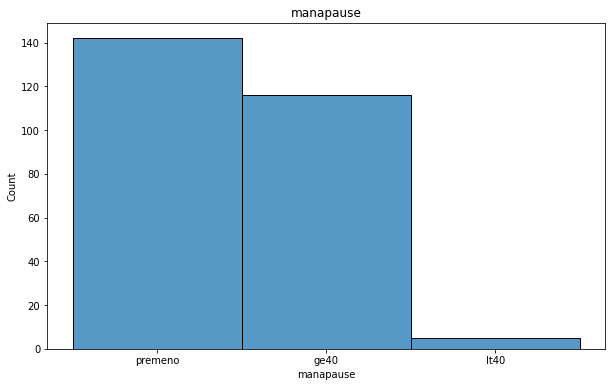

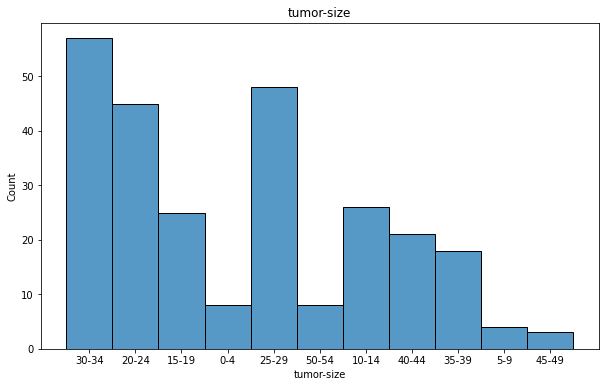

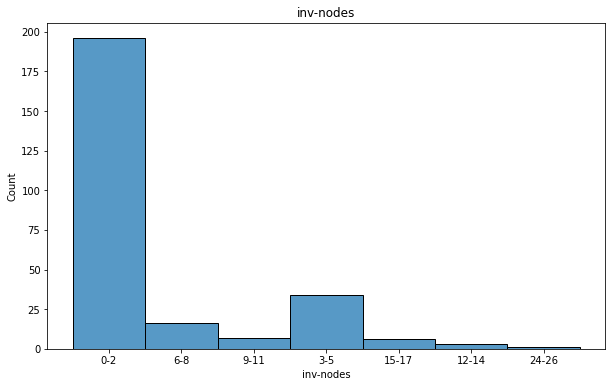

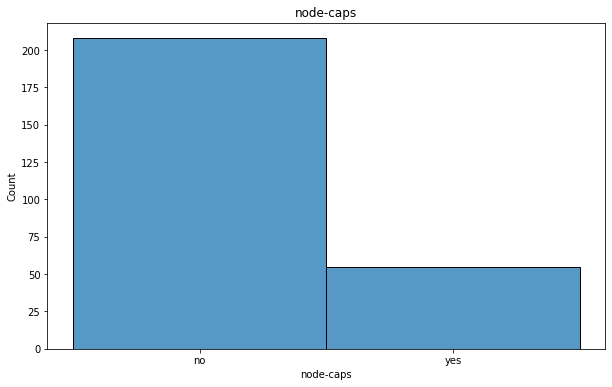

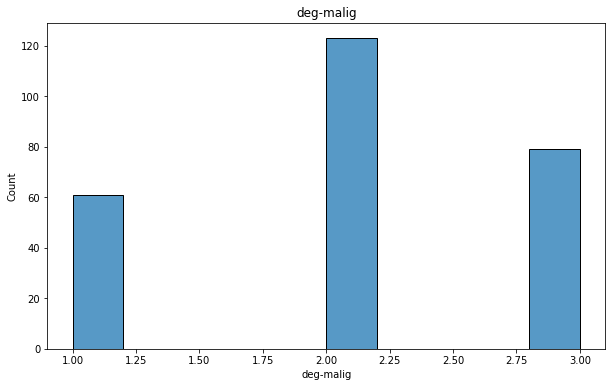

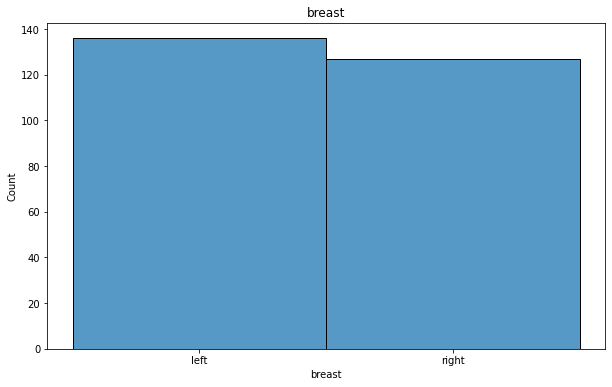

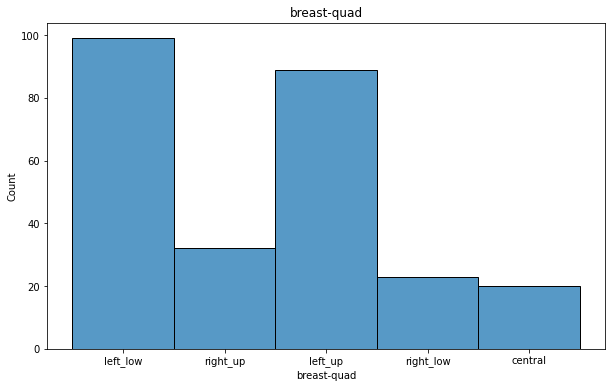

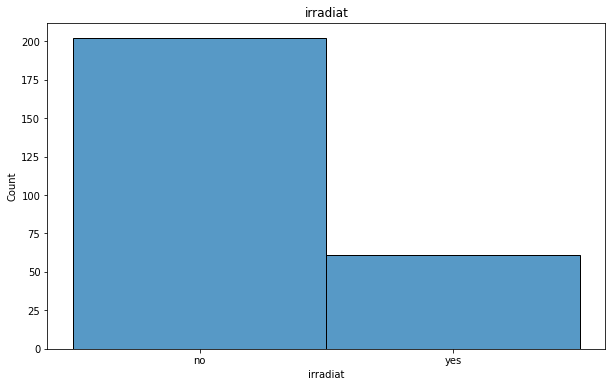

In [16]:
for i in df.columns:
    plt.figure(figsize=(10,6))
    plt.title(i)
    sns.histplot(df[i])
    plt.show()

<Figure size 720x432 with 0 Axes>

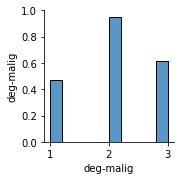

In [18]:
plt.figure(figsize=(10,6))
sns.pairplot(df)
plt.show()

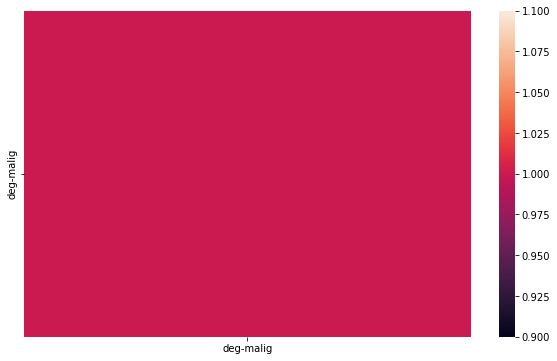

In [19]:
plt.figure(figsize=(10,6))
sns.heatmap(df.select_dtypes(include=np.number).corr().round(2))
plt.show()

In [20]:
df.columns

Index(['Class', 'age', 'manapause', 'tumor-size', 'inv-nodes', 'node-caps',
       'deg-malig', 'breast', 'breast-quad', 'irradiat'],
      dtype='object')

In [11]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]
x

,Class,age,manapause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad
0,no-recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up
2,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low
3,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up
4,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low
...,...,...,...,...,...,...,...,...,...
281,recurrence-events,30-39,premeno,30-34,0-2,no,2,left,left_up
282,recurrence-events,30-39,premeno,20-24,0-2,no,3,left,left_up
283,recurrence-events,60-69,ge40,20-24,0-2,no,1,right,left_up
284,recurrence-events,40-49,ge40,30-34,3-5,no,3,left,left_low


In [12]:
y

0       no
1       no
2       no
3       no
4       no
      ... 
281     no
282    yes
283     no
284     no
285     no
Name: irradiat, Length: 263, dtype: object

In [13]:
from sklearn.preprocessing import LabelEncoder,StandardScaler,MinMaxScaler
lab=LabelEncoder()
stand=StandardScaler()
min=MinMaxScaler()


In [14]:
for i in x.columns:
    x[i]=lab.fit_transform(x[i])
x

,Class,age,manapause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad
0,0,1,2,5,0,0,2,0,1
1,0,2,2,3,0,0,1,1,4
2,0,2,2,3,0,0,1,0,1
3,0,4,0,2,0,0,1,1,2
4,0,2,2,0,0,0,1,1,3
...,...,...,...,...,...,...,...,...,...
281,1,1,2,5,0,0,1,0,2
282,1,1,2,3,0,0,2,0,2
283,1,4,0,3,0,0,0,1,2
284,1,2,0,5,4,0,2,0,1


In [ ]:
plt.figure(figsize=(10,6))
sns.pairplot(x)
plt.show()

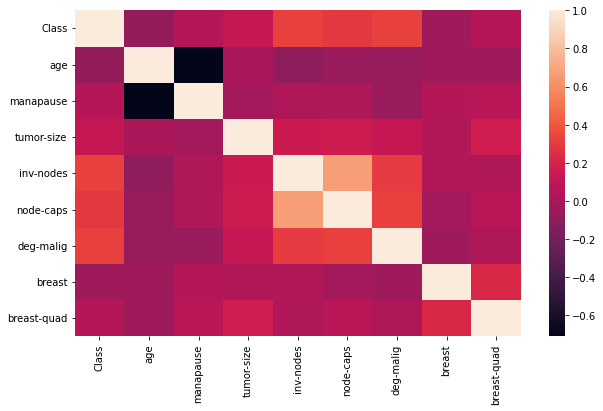

In [15]:
plt.figure(figsize=(10,6))
sns.heatmap(x.select_dtypes(include=np.number).corr().round(2))
plt.show()

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest,f_classif
from sklearn.decomposition import PCA


In [28]:
x_select=SelectKBest(f_classif,k=5).fit_transform(x,y)
y_select=y
x_select

array([[0, 5, 0, 0, 2],
       [0, 3, 0, 0, 1],
       [0, 3, 0, 0, 1],
       ...,
       [1, 3, 0, 0, 0],
       [1, 5, 4, 0, 2],
       [1, 5, 4, 0, 2]], dtype=int64)

In [29]:
pca=PCA(n_components=2)
x_pca=pca.fit_transform(x)
x_pca

array([[ 3.73008491e-01, -1.04233104e+00],
       [-1.22559386e+00, -5.08039657e-01],
       [-1.53194396e+00, -4.07418587e-01],
       [-2.36996456e+00, -2.85101994e-01],
       [-4.03872107e+00,  7.57326753e-01],
       [-2.48057964e+00, -2.53291633e-01],
       [-6.44537956e-01, -8.99698125e-01],
       [-1.65259182e+00, -7.67381050e-01],
       [ 4.80366201e+00, -3.27966105e+00],
       [-1.42132888e+00, -4.39228949e-01],
       [-4.26797242e+00,  9.61716887e-01],
       [-6.52725938e-01, -9.91973151e-01],
       [-3.16506843e+00, -3.81889361e-03],
       [-2.82024663e-01, -9.91420147e-01],
       [ 4.53195433e-01, -1.15869558e+00],
       [ 1.61675305e-01, -1.54188424e+00],
       [-2.43703052e+00,  2.90176443e-03],
       [ 3.37647358e-01, -1.20624941e+00],
       [ 3.11778810e-01, -1.38048362e+00],
       [ 4.81611976e-01, -1.60668364e+00],
       [ 2.06253376e+00, -2.22293421e+00],
       [-5.96429255e-01, -7.33184762e-01],
       [ 2.16858925e+00, -2.16506453e+00],
       [ 1.

In [30]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)
x_train_select,x_test_select,y_train_select,y_test_select=train_test_split(x_select,y_select,test_size=0.3)

In [31]:
x_train=stand.fit_transform(x_train)
x_train=min.fit_transform(x_train)
x_train_select=stand.fit_transform(x_train_select)
x_train_select=stand.fit_transform(x_train_select)
x_train_pca=pca.fit_transform(x_train)

In [49]:
from sklearn.linear_model import Perceptron
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,BaggingClassifier
from sklearn.metrics import accuracy_score,classification_report,roc_curve,auc


In [52]:
def Perceptron_model(x_train,x_test,y_train,y_test,tit):
    model=Perceptron()
    y_train=lab.fit_transform(y_train)
    y_test=lab.fit_transform(y_test)
    model.fit(x_train,y_train)
    pred_train=model.predict(x_train)
    print("Training")
    print(classification_report(y_train,pred_train))
    
    pred_prob_train=model.decision_function(x_train)
    fpr,tpr,_=roc_curve(y_train,pred_prob_train)
    auc1=auc(fpr,tpr)
    plt.plot(fpr,tpr,label="training auc:%.2f"%auc1)
    
    pred_test=model.predict(x_test)
    print("Testing")
    print(classification_report(y_test,pred_test))
    
    pred_prob_test=model.decision_function(x_test)
    fpr,tpr,_=roc_curve(y_test,pred_prob_test)
    auc2=auc(fpr,tpr)
    plt.plot(fpr,tpr,label="testing auc:%.2f"%auc1)
    plt.title(tit)
    plt.legend()
    plt.show()


Training
              precision    recall  f1-score   support

           0       0.76      1.00      0.86       139
           1       0.00      0.00      0.00        45

    accuracy                           0.76       184
   macro avg       0.38      0.50      0.43       184
weighted avg       0.57      0.76      0.65       184

Testing
              precision    recall  f1-score   support

           0       0.80      0.81      0.80        63
           1       0.20      0.19      0.19        16

    accuracy                           0.68        79
   macro avg       0.50      0.50      0.50        79
weighted avg       0.68      0.68      0.68        79



C:\Users\Harish Kumar M V\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Harish Kumar M V\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Harish Kumar M V\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this 

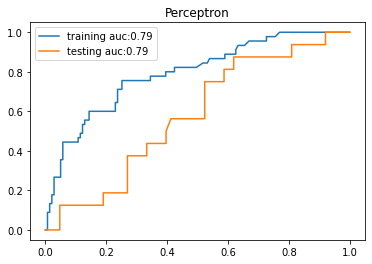

In [53]:
Perceptron_model(x_train,x_test,y_train,y_test,"Perceptron")


Training
              precision    recall  f1-score   support

           0       0.73      0.91      0.81       137
           1       0.13      0.04      0.06        47

    accuracy                           0.68       184
   macro avg       0.43      0.47      0.44       184
weighted avg       0.58      0.68      0.62       184

Testing
              precision    recall  f1-score   support

           0       0.82      1.00      0.90        65
           1       0.00      0.00      0.00        14

    accuracy                           0.82        79
   macro avg       0.41      0.50      0.45        79
weighted avg       0.68      0.82      0.74        79



C:\Users\Harish Kumar M V\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Harish Kumar M V\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Harish Kumar M V\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this 

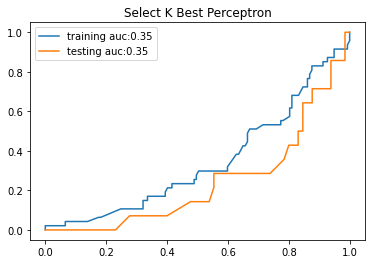

In [54]:
Perceptron_model(x_train_select,x_test_select,y_train_select,y_test_select,"Select K Best Perceptron")


Training
              precision    recall  f1-score   support

           0       0.78      0.96      0.86       139
           1       0.62      0.18      0.28        45

    accuracy                           0.77       184
   macro avg       0.70      0.57      0.57       184
weighted avg       0.74      0.77      0.72       184

Testing
              precision    recall  f1-score   support

           0       0.85      0.70      0.77        63
           1       0.30      0.50      0.37        16

    accuracy                           0.66        79
   macro avg       0.57      0.60      0.57        79
weighted avg       0.73      0.66      0.69        79



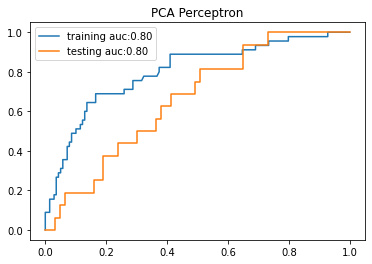

In [55]:
x_test_pca=pca.fit_transform(x_test)
Perceptron_model(x_train_pca,x_test_pca,y_train,y_test,"PCA Perceptron")


In [64]:
def NaiveBayes(x_train,x_test,y_train,y_test,tit):
        model=GaussianNB()
        y_train=lab.fit_transform(y_train)
        y_test=lab.fit_transform(y_test)
        model.fit(x_train,y_train)
        pred_train=model.predict(x_train)
        print("Training")
        print(classification_report(y_train,pred_train))
        
        pred_prob_train=model.predict_proba(x_train)[:,1]
        fpr,tpr,_=roc_curve(y_train,pred_prob_train)
        auc1=auc(fpr,tpr)
        plt.plot(fpr,tpr,label="training auc:%.2f"%auc1)
        
        pred_test=model.predict(x_test)
        print("Testing")
        print(classification_report(y_test,pred_test))
        
        pred_prob_test=model.predict_proba(x_test)[:,1]
        fpr,tpr,_=roc_curve(y_test,pred_prob_test)
        auc2=auc(fpr,tpr)
        plt.plot(fpr,tpr,label="testing auc:%.2f"%auc1)
        plt.title(tit)
        plt.legend()
        plt.show()    
    

Training
              precision    recall  f1-score   support

           0       0.87      0.87      0.87       139
           1       0.60      0.60      0.60        45

    accuracy                           0.80       184
   macro avg       0.74      0.74      0.74       184
weighted avg       0.80      0.80      0.80       184

Testing
              precision    recall  f1-score   support

           0       0.90      0.44      0.60        63
           1       0.27      0.81      0.41        16

    accuracy                           0.52        79
   macro avg       0.59      0.63      0.50        79
weighted avg       0.78      0.52      0.56        79



C:\Users\Harish Kumar M V\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(
C:\Users\Harish Kumar M V\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(


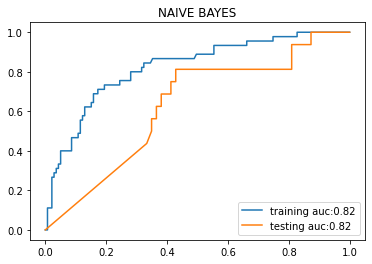

In [66]:
NaiveBayes(x_train,x_test,y_train,y_test,"NAIVE BAYES")

Training
              precision    recall  f1-score   support

           0       0.84      0.82      0.83       137
           1       0.52      0.55      0.54        47

    accuracy                           0.76       184
   macro avg       0.68      0.69      0.69       184
weighted avg       0.76      0.76      0.76       184

Testing
              precision    recall  f1-score   support

           0       0.95      0.32      0.48        65
           1       0.23      0.93      0.37        14

    accuracy                           0.43        79
   macro avg       0.59      0.63      0.42        79
weighted avg       0.83      0.43      0.46        79



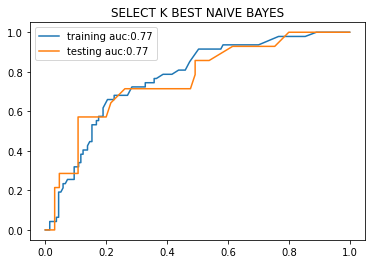

In [68]:
NaiveBayes(x_train_select,x_test_select,y_train_select,y_test_select,"SELECT K BEST NAIVE BAYES")

Training
              precision    recall  f1-score   support

           0       0.82      0.92      0.86       139
           1       0.59      0.36      0.44        45

    accuracy                           0.78       184
   macro avg       0.70      0.64      0.65       184
weighted avg       0.76      0.78      0.76       184

Testing
              precision    recall  f1-score   support

           0       0.79      0.35      0.48        63
           1       0.20      0.62      0.30        16

    accuracy                           0.41        79
   macro avg       0.49      0.49      0.39        79
weighted avg       0.67      0.41      0.45        79



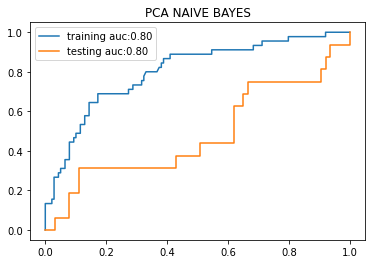

In [69]:
NaiveBayes(x_train_pca,x_test_pca,y_train,y_test,"PCA NAIVE BAYES")

In [84]:
def svc_model(x_train,x_test,y_train,y_test,tit,ker):
    model=SVC(kernel=ker)
    y_train=lab.fit_transform(y_train)
    y_test=lab.fit_transform(y_test)
    model.fit(x_train,y_train)
    pred_train=model.predict(x_train)
    print("Training")
    print(classification_report(y_train,pred_train))
    
    pred_prob_train=model.decision_function(x_train)
    fpr,tpr,_=roc_curve(y_train,pred_prob_train)
    auc1=auc(fpr,tpr)
    plt.plot(fpr,tpr,label="training auc:%.2f"%auc1)
    
    pred_test=model.predict(x_test)
    print("Testing")
    print(classification_report(y_test,pred_test))
    
    pred_prob_test=model.decision_function(x_test)
    fpr,tpr,_=roc_curve(y_test,pred_prob_test)
    auc2=auc(fpr,tpr)
    plt.plot(fpr,tpr,label="testing auc:%.2f"%auc1)
    plt.title(i+" "+tit)
    plt.legend()
    plt.show()


Training
              precision    recall  f1-score   support

           0       0.84      0.89      0.87       139
           1       0.59      0.49      0.54        45

    accuracy                           0.79       184
   macro avg       0.72      0.69      0.70       184
weighted avg       0.78      0.79      0.79       184

Testing
              precision    recall  f1-score   support

           0       0.82      0.79      0.81        63
           1       0.28      0.31      0.29        16

    accuracy                           0.70        79
   macro avg       0.55      0.55      0.55        79
weighted avg       0.71      0.70      0.70        79



C:\Users\Harish Kumar M V\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
C:\Users\Harish Kumar M V\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


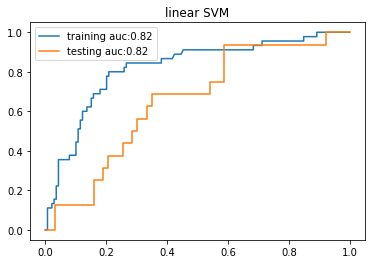

Training
              precision    recall  f1-score   support

           0       0.76      0.89      0.82       139
           1       0.25      0.11      0.15        45

    accuracy                           0.70       184
   macro avg       0.50      0.50      0.49       184
weighted avg       0.63      0.70      0.66       184

Testing
              precision    recall  f1-score   support

           0       0.80      1.00      0.89        63
           1       0.00      0.00      0.00        16

    accuracy                           0.80        79
   macro avg       0.40      0.50      0.44        79
weighted avg       0.64      0.80      0.71        79



C:\Users\Harish Kumar M V\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
C:\Users\Harish Kumar M V\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Harish Kumar M V\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Harish Kumar M V\AppData\Local\Programs\Python\Python310\lib\site-packag

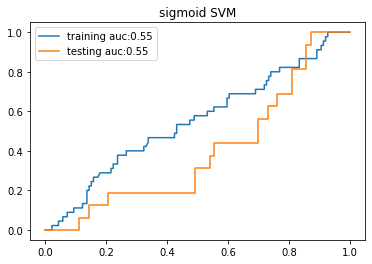

C:\Users\Harish Kumar M V\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


Training
              precision    recall  f1-score   support

           0       0.89      0.96      0.93       139
           1       0.85      0.64      0.73        45

    accuracy                           0.89       184
   macro avg       0.87      0.80      0.83       184
weighted avg       0.88      0.89      0.88       184

Testing
              precision    recall  f1-score   support

           0       0.84      0.51      0.63        63
           1       0.24      0.62      0.35        16

    accuracy                           0.53        79
   macro avg       0.54      0.57      0.49        79
weighted avg       0.72      0.53      0.58        79



C:\Users\Harish Kumar M V\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


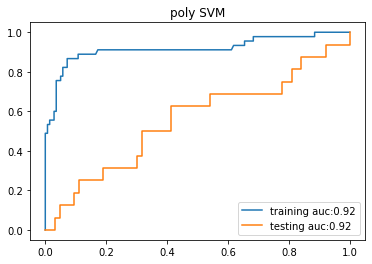

Training
              precision    recall  f1-score   support

           0       0.86      0.96      0.91       139
           1       0.83      0.53      0.65        45

    accuracy                           0.86       184
   macro avg       0.85      0.75      0.78       184
weighted avg       0.86      0.86      0.85       184



C:\Users\Harish Kumar M V\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
C:\Users\Harish Kumar M V\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Harish Kumar M V\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Harish Kumar M V\AppData\Local\Programs\Python\Python310\lib\site-packag

Testing
              precision    recall  f1-score   support

           0       0.80      1.00      0.89        63
           1       0.00      0.00      0.00        16

    accuracy                           0.80        79
   macro avg       0.40      0.50      0.44        79
weighted avg       0.64      0.80      0.71        79



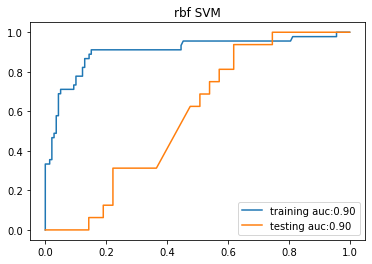

In [85]:
for i in ["linear","sigmoid","poly","rbf"]:
    svc_model(x_train,x_test,y_train,y_test,"SVM",i)

Training
              precision    recall  f1-score   support

           0       0.83      0.85      0.84       137
           1       0.52      0.49      0.51        47

    accuracy                           0.76       184
   macro avg       0.68      0.67      0.67       184
weighted avg       0.75      0.76      0.75       184

Testing
              precision    recall  f1-score   support

           0       0.85      0.89      0.87        65
           1       0.36      0.29      0.32        14

    accuracy                           0.78        79
   macro avg       0.61      0.59      0.60        79
weighted avg       0.77      0.78      0.77        79



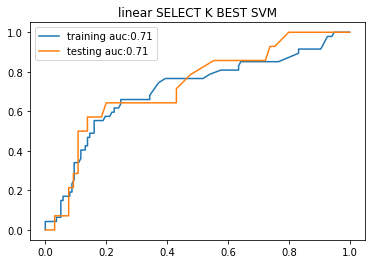

Training
              precision    recall  f1-score   support

           0       0.77      0.90      0.83       137
           1       0.42      0.21      0.28        47

    accuracy                           0.72       184
   macro avg       0.59      0.56      0.55       184
weighted avg       0.68      0.72      0.69       184

Testing
              precision    recall  f1-score   support

           0       0.94      0.74      0.83        65
           1       0.39      0.79      0.52        14

    accuracy                           0.75        79
   macro avg       0.67      0.76      0.68        79
weighted avg       0.84      0.75      0.77        79



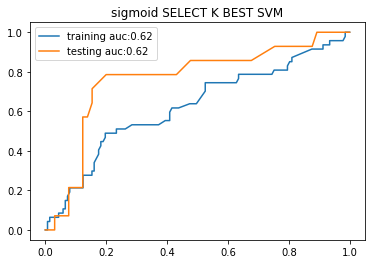

Training
              precision    recall  f1-score   support

           0       0.80      0.96      0.88       137
           1       0.75      0.32      0.45        47

    accuracy                           0.80       184
   macro avg       0.78      0.64      0.66       184
weighted avg       0.79      0.80      0.77       184

Testing
              precision    recall  f1-score   support

           0       0.87      0.51      0.64        65
           1       0.22      0.64      0.33        14

    accuracy                           0.53        79
   macro avg       0.54      0.58      0.48        79
weighted avg       0.75      0.53      0.59        79



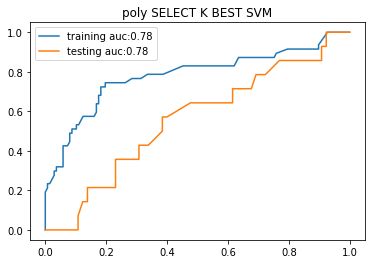

Training
              precision    recall  f1-score   support

           0       0.80      0.97      0.88       137
           1       0.78      0.30      0.43        47

    accuracy                           0.80       184
   macro avg       0.79      0.63      0.65       184
weighted avg       0.80      0.80      0.76       184

Testing
              precision    recall  f1-score   support

           0       0.82      0.98      0.90        65
           1       0.00      0.00      0.00        14

    accuracy                           0.81        79
   macro avg       0.41      0.49      0.45        79
weighted avg       0.68      0.81      0.74        79



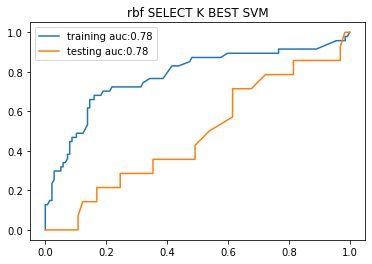

In [86]:
for i in ["linear","sigmoid","poly","rbf"]:
    svc_model(x_train_select,x_test_select,y_train_select,y_test_select,"SELECT K BEST SVM",i)

Training
              precision    recall  f1-score   support

           0       0.80      0.95      0.87       139
           1       0.65      0.29      0.40        45

    accuracy                           0.79       184
   macro avg       0.73      0.62      0.64       184
weighted avg       0.77      0.79      0.76       184

Testing
              precision    recall  f1-score   support

           0       0.84      0.60      0.70        63
           1       0.26      0.56      0.36        16

    accuracy                           0.59        79
   macro avg       0.55      0.58      0.53        79
weighted avg       0.73      0.59      0.63        79



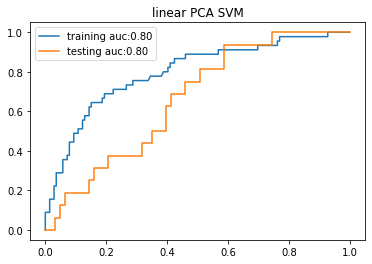

Training
              precision    recall  f1-score   support

           0       0.81      0.89      0.85       139
           1       0.50      0.33      0.40        45

    accuracy                           0.76       184
   macro avg       0.65      0.61      0.62       184
weighted avg       0.73      0.76      0.74       184

Testing
              precision    recall  f1-score   support

           0       0.81      0.41      0.55        63
           1       0.21      0.62      0.32        16

    accuracy                           0.46        79
   macro avg       0.51      0.52      0.43        79
weighted avg       0.69      0.46      0.50        79



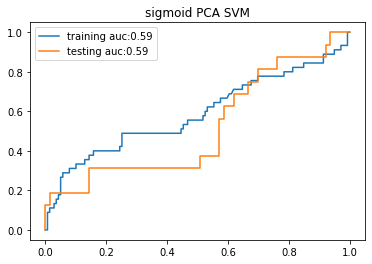

Training
              precision    recall  f1-score   support

           0       0.80      0.97      0.88       139
           1       0.75      0.27      0.39        45

    accuracy                           0.80       184
   macro avg       0.78      0.62      0.64       184
weighted avg       0.79      0.80      0.76       184

Testing
              precision    recall  f1-score   support

           0       0.83      0.78      0.80        63
           1       0.30      0.38      0.33        16

    accuracy                           0.70        79
   macro avg       0.57      0.58      0.57        79
weighted avg       0.72      0.70      0.71        79



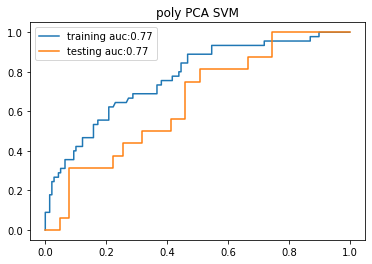

Training
              precision    recall  f1-score   support

           0       0.82      0.94      0.87       139
           1       0.64      0.36      0.46        45

    accuracy                           0.79       184
   macro avg       0.73      0.65      0.66       184
weighted avg       0.77      0.79      0.77       184

Testing
              precision    recall  f1-score   support

           0       0.82      0.94      0.87        63
           1       0.43      0.19      0.26        16

    accuracy                           0.78        79
   macro avg       0.62      0.56      0.57        79
weighted avg       0.74      0.78      0.75        79



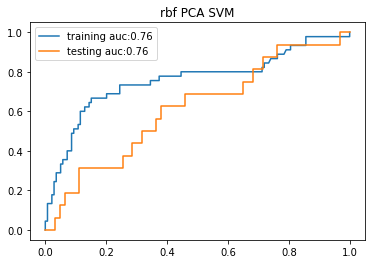

In [87]:
for i in ["linear","sigmoid","poly","rbf"]:
    svc_model(x_train_pca,x_test_pca,y_train,y_test,"PCA SVM",i)

In [90]:
def MLP(x_train,x_test,y_train,y_test,tit):
        model=MLPClassifier()
        y_train=lab.fit_transform(y_train)
        y_test=lab.fit_transform(y_test)
        model.fit(x_train,y_train)
        pred_train=model.predict(x_train)
        print("Training")
        print(classification_report(y_train,pred_train))
        
        pred_prob_train=model.predict_proba(x_train)[:,1]
        fpr,tpr,_=roc_curve(y_train,pred_prob_train)
        auc1=auc(fpr,tpr)
        plt.plot(fpr,tpr,label="training auc:%.2f"%auc1)
        
        pred_test=model.predict(x_test)
        print("Testing")
        print(classification_report(y_test,pred_test))
        
        pred_prob_test=model.predict_proba(x_test)[:,1]
        fpr,tpr,_=roc_curve(y_test,pred_prob_test)
        auc2=auc(fpr,tpr)
        plt.plot(fpr,tpr,label="testing auc:%.2f"%auc1)
        plt.title(tit)
        plt.legend()
        plt.show()    
    

C:\Users\Harish Kumar M V\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Harish Kumar M V\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
C:\Users\Harish Kumar M V\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(


Training
              precision    recall  f1-score   support

           0       0.85      0.94      0.89       139
           1       0.73      0.49      0.59        45

    accuracy                           0.83       184
   macro avg       0.79      0.72      0.74       184
weighted avg       0.82      0.83      0.82       184

Testing
              precision    recall  f1-score   support

           0       0.80      0.84      0.82        63
           1       0.23      0.19      0.21        16

    accuracy                           0.71        79
   macro avg       0.52      0.51      0.51        79
weighted avg       0.69      0.71      0.70        79



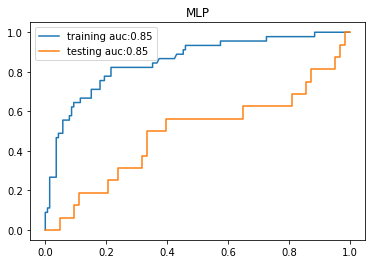

In [91]:
MLP(x_train,x_test,y_train,y_test,"MLP")

C:\Users\Harish Kumar M V\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Training
              precision    recall  f1-score   support

           0       0.83      0.95      0.89       137
           1       0.75      0.45      0.56        47

    accuracy                           0.82       184
   macro avg       0.79      0.70      0.72       184
weighted avg       0.81      0.82      0.80       184

Testing
              precision    recall  f1-score   support

           0       0.79      0.74      0.76        65
           1       0.06      0.07      0.06        14

    accuracy                           0.62        79
   macro avg       0.42      0.40      0.41        79
weighted avg       0.66      0.62      0.64        79



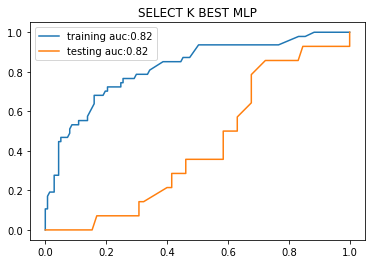

In [92]:
MLP(x_train_select,x_test_select,y_train_select,y_test_select,"SELECT K BEST MLP")

Training
              precision    recall  f1-score   support

           0       0.83      0.93      0.87       139
           1       0.64      0.40      0.49        45

    accuracy                           0.80       184
   macro avg       0.73      0.66      0.68       184
weighted avg       0.78      0.80      0.78       184

Testing
              precision    recall  f1-score   support

           0       0.88      0.68      0.77        63
           1       0.33      0.62      0.43        16

    accuracy                           0.67        79
   macro avg       0.61      0.65      0.60        79
weighted avg       0.77      0.67      0.70        79



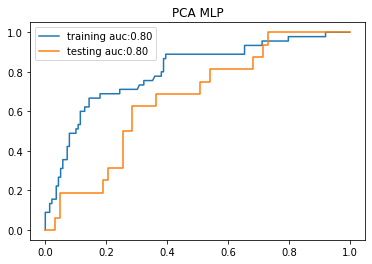

In [93]:
MLP(x_train_pca,x_test_pca,y_train,y_test,"PCA MLP")

In [108]:
def KNN(x_train,x_test,y_train,y_test,tit,i):
        model=KNeighborsClassifier(metric=i)
        y_train=lab.fit_transform(y_train)
        y_test=lab.fit_transform(y_test)
        model.fit(x_train,y_train)
        pred_train=model.predict(x_train)
        print("Training")
        print(classification_report(y_train,pred_train))
        
        pred_prob_train=model.predict_proba(x_train)[:,1]
        fpr,tpr,_=roc_curve(y_train,pred_prob_train)
        auc1=auc(fpr,tpr)
        plt.plot(fpr,tpr,label="training auc:%.2f"%auc1)
        
        pred_test=model.predict(x_test)
        print("Testing")
        print(classification_report(y_test,pred_test))
        
        pred_prob_test=model.predict_proba(x_test)[:,1]
        fpr,tpr,_=roc_curve(y_test,pred_prob_test)
        auc2=auc(fpr,tpr)
        plt.plot(fpr,tpr,label="testing auc:%.2f"%auc1)
        plt.title(i+" "+tit)
        plt.legend()
        plt.show()    
    

Training
              precision    recall  f1-score   support

           0       0.86      0.96      0.91       139
           1       0.83      0.53      0.65        45

    accuracy                           0.86       184
   macro avg       0.85      0.75      0.78       184
weighted avg       0.86      0.86      0.85       184

Testing
              precision    recall  f1-score   support

           0       0.88      0.78      0.82        63
           1       0.39      0.56      0.46        16

    accuracy                           0.73        79
   macro avg       0.63      0.67      0.64        79
weighted avg       0.78      0.73      0.75        79



C:\Users\Harish Kumar M V\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
C:\Users\Harish Kumar M V\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


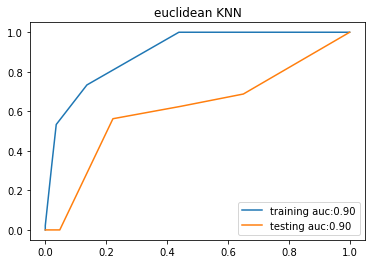

Training
              precision    recall  f1-score   support

           0       0.84      0.95      0.89       139
           1       0.74      0.44      0.56        45

    accuracy                           0.83       184
   macro avg       0.79      0.70      0.72       184
weighted avg       0.82      0.83      0.81       184

Testing
              precision    recall  f1-score   support

           0       0.83      0.84      0.83        63
           1       0.33      0.31      0.32        16

    accuracy                           0.73        79
   macro avg       0.58      0.58      0.58        79
weighted avg       0.73      0.73      0.73        79



C:\Users\Harish Kumar M V\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
C:\Users\Harish Kumar M V\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


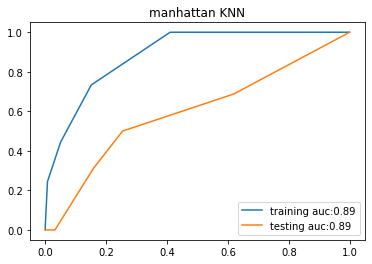

Training
              precision    recall  f1-score   support

           0       0.86      0.96      0.91       139
           1       0.83      0.53      0.65        45

    accuracy                           0.86       184
   macro avg       0.85      0.75      0.78       184
weighted avg       0.86      0.86      0.85       184

Testing
              precision    recall  f1-score   support

           0       0.88      0.78      0.82        63
           1       0.39      0.56      0.46        16

    accuracy                           0.73        79
   macro avg       0.63      0.67      0.64        79
weighted avg       0.78      0.73      0.75        79



C:\Users\Harish Kumar M V\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
C:\Users\Harish Kumar M V\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


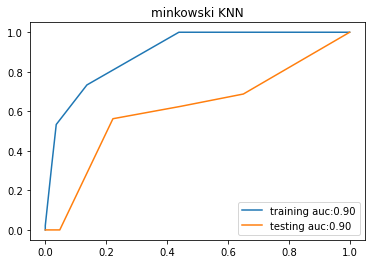

In [109]:
for i in ["euclidean","manhattan","minkowski"]:
    KNN(x_train,x_test,y_train,y_test,"KNN",i)

Training
              precision    recall  f1-score   support

           0       0.79      0.92      0.85       137
           1       0.56      0.30      0.39        47

    accuracy                           0.76       184
   macro avg       0.68      0.61      0.62       184
weighted avg       0.73      0.76      0.73       184

Testing
              precision    recall  f1-score   support

           0       0.81      0.80      0.81        65
           1       0.13      0.14      0.14        14

    accuracy                           0.68        79
   macro avg       0.47      0.47      0.47        79
weighted avg       0.69      0.68      0.69        79



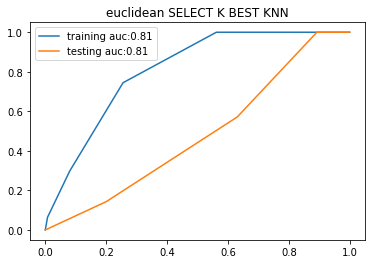

Training
              precision    recall  f1-score   support

           0       0.78      0.91      0.84       137
           1       0.48      0.26      0.33        47

    accuracy                           0.74       184
   macro avg       0.63      0.58      0.59       184
weighted avg       0.70      0.74      0.71       184

Testing
              precision    recall  f1-score   support

           0       0.83      0.97      0.89        65
           1       0.33      0.07      0.12        14

    accuracy                           0.81        79
   macro avg       0.58      0.52      0.51        79
weighted avg       0.74      0.81      0.76        79



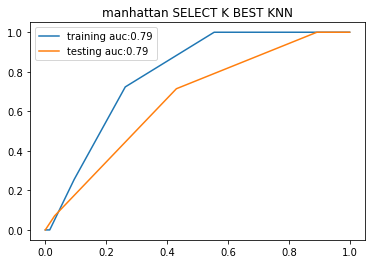

Training
              precision    recall  f1-score   support

           0       0.79      0.92      0.85       137
           1       0.56      0.30      0.39        47

    accuracy                           0.76       184
   macro avg       0.68      0.61      0.62       184
weighted avg       0.73      0.76      0.73       184

Testing
              precision    recall  f1-score   support

           0       0.81      0.80      0.81        65
           1       0.13      0.14      0.14        14

    accuracy                           0.68        79
   macro avg       0.47      0.47      0.47        79
weighted avg       0.69      0.68      0.69        79



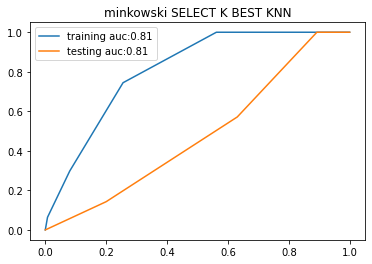

In [110]:
for i in ["euclidean","manhattan","minkowski"]:
    KNN(x_train_select,x_test_select,y_train_select,y_test_select,"SELECT K BEST KNN",i)

Training
              precision    recall  f1-score   support

           0       0.85      0.93      0.89       139
           1       0.70      0.51      0.59        45

    accuracy                           0.83       184
   macro avg       0.78      0.72      0.74       184
weighted avg       0.82      0.83      0.82       184

Testing
              precision    recall  f1-score   support

           0       0.86      0.60      0.71        63
           1       0.29      0.62      0.39        16

    accuracy                           0.61        79
   macro avg       0.57      0.61      0.55        79
weighted avg       0.75      0.61      0.65        79



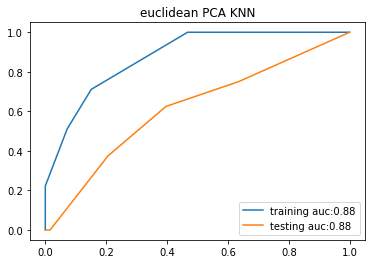

Training
              precision    recall  f1-score   support

           0       0.85      0.92      0.88       139
           1       0.67      0.49      0.56        45

    accuracy                           0.82       184
   macro avg       0.76      0.70      0.72       184
weighted avg       0.80      0.82      0.80       184

Testing
              precision    recall  f1-score   support

           0       0.87      0.63      0.73        63
           1       0.30      0.62      0.41        16

    accuracy                           0.63        79
   macro avg       0.59      0.63      0.57        79
weighted avg       0.75      0.63      0.67        79



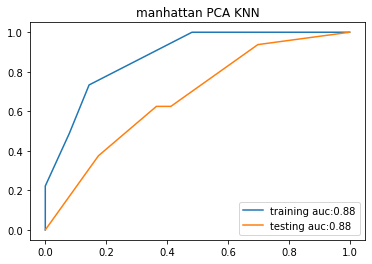

Training
              precision    recall  f1-score   support

           0       0.85      0.93      0.89       139
           1       0.70      0.51      0.59        45

    accuracy                           0.83       184
   macro avg       0.78      0.72      0.74       184
weighted avg       0.82      0.83      0.82       184

Testing
              precision    recall  f1-score   support

           0       0.86      0.60      0.71        63
           1       0.29      0.62      0.39        16

    accuracy                           0.61        79
   macro avg       0.57      0.61      0.55        79
weighted avg       0.75      0.61      0.65        79



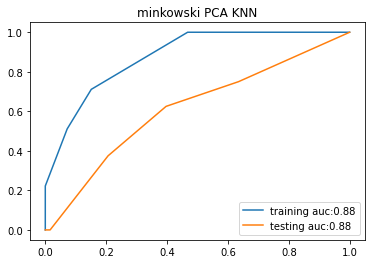

In [111]:
for i in ["euclidean","manhattan","minkowski"]:
    KNN(x_train_pca,x_test_pca,y_train,y_test,"PCA KNN",i)

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       139
           1       1.00      0.96      0.98        45

    accuracy                           0.99       184
   macro avg       0.99      0.98      0.99       184
weighted avg       0.99      0.99      0.99       184



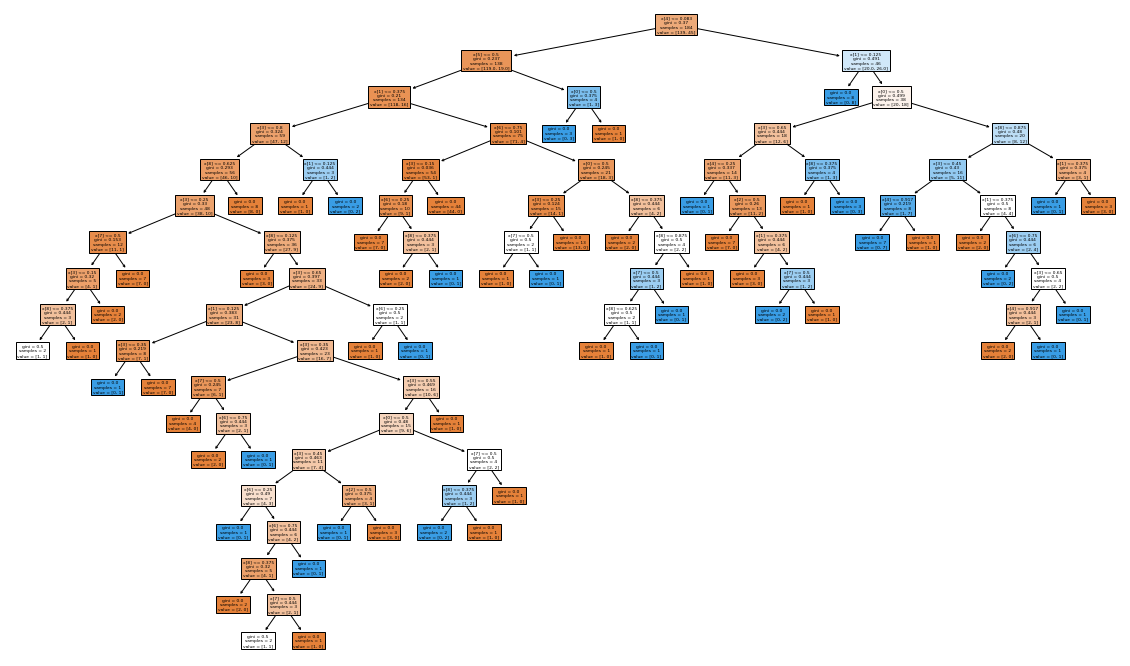

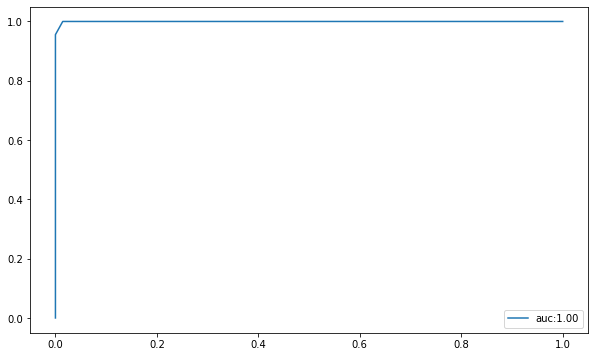

In [118]:
 
model=DecisionTreeClassifier()
model.fit(x_train,y_train)
pred=model.predict(x_train)
print(classification_report(y_train,pred))

pred_prob=model.predict_proba(x_train)[:,1]
fpr,tpr,_=roc_curve(y_train,pred_prob)
auc1=auc(fpr,tpr)
plt.figure(figsize=(10,6))
plt.plot(fpr,tpr,label="auc:%.2f"%auc1)
plt.legend()
plt.show()

In [122]:
from sklearn import tree
def DecisionTree(x_train,x_test,y_train,y_test,tit,i):
        model=DecisionTreeClassifier(criterion=i)
        y_train=lab.fit_transform(y_train)
        y_test=lab.fit_transform(y_test)
        model.fit(x_train,y_train)
        plt.figure(figsize=(20,12))
        tree.plot_tree(model,filled=True)
        plt.title(i+" Decision Tree")
        plt.show()
        pred_train=model.predict(x_train)
        print("Training")
        print(classification_report(y_train,pred_train))
        
        pred_prob_train=model.predict_proba(x_train)[:,1]
        fpr,tpr,_=roc_curve(y_train,pred_prob_train)
        auc1=auc(fpr,tpr)
        plt.plot(fpr,tpr,label="training auc:%.2f"%auc1)
        
        pred_test=model.predict(x_test)
        print("Testing")
        print(classification_report(y_test,pred_test))
        
        pred_prob_test=model.predict_proba(x_test)[:,1]
        fpr,tpr,_=roc_curve(y_test,pred_prob_test)
        auc2=auc(fpr,tpr)
        plt.plot(fpr,tpr,label="testing auc:%.2f"%auc1)
        plt.title(i+" "+tit)
        plt.legend()
        plt.show()    
    

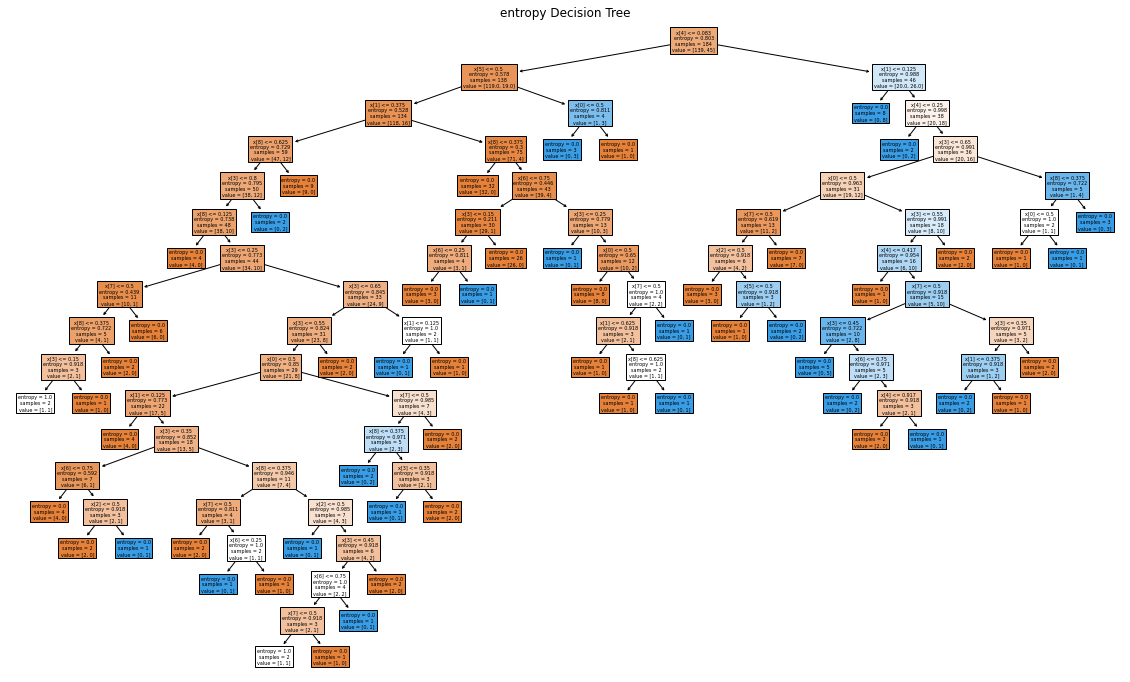

Training
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       139
           1       1.00      0.96      0.98        45

    accuracy                           0.99       184
   macro avg       0.99      0.98      0.99       184
weighted avg       0.99      0.99      0.99       184

Testing
              precision    recall  f1-score   support

           0       0.85      0.63      0.73        63
           1       0.28      0.56      0.38        16

    accuracy                           0.62        79
   macro avg       0.57      0.60      0.55        79
weighted avg       0.74      0.62      0.66        79



C:\Users\Harish Kumar M V\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
C:\Users\Harish Kumar M V\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


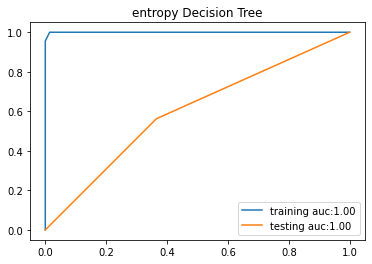

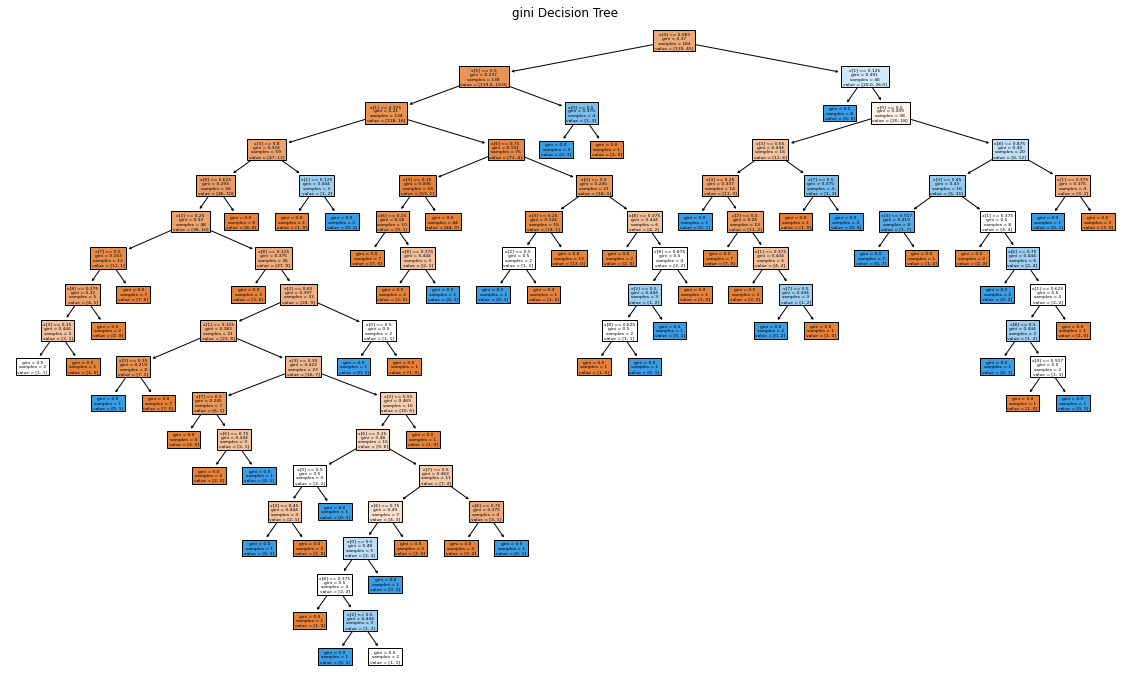

Training
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       139
           1       1.00      0.96      0.98        45

    accuracy                           0.99       184
   macro avg       0.99      0.98      0.99       184
weighted avg       0.99      0.99      0.99       184

Testing
              precision    recall  f1-score   support

           0       0.84      0.90      0.87        63
           1       0.45      0.31      0.37        16

    accuracy                           0.78        79
   macro avg       0.65      0.61      0.62        79
weighted avg       0.76      0.78      0.77        79



C:\Users\Harish Kumar M V\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
C:\Users\Harish Kumar M V\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


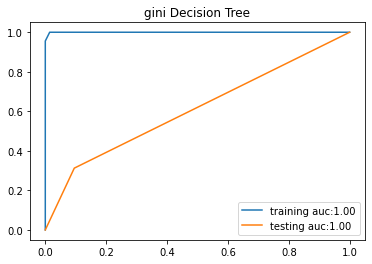

In [123]:
for i in ["entropy","gini"]:
    DecisionTree(x_train,x_test,y_train,y_test,"Decision Tree",i)

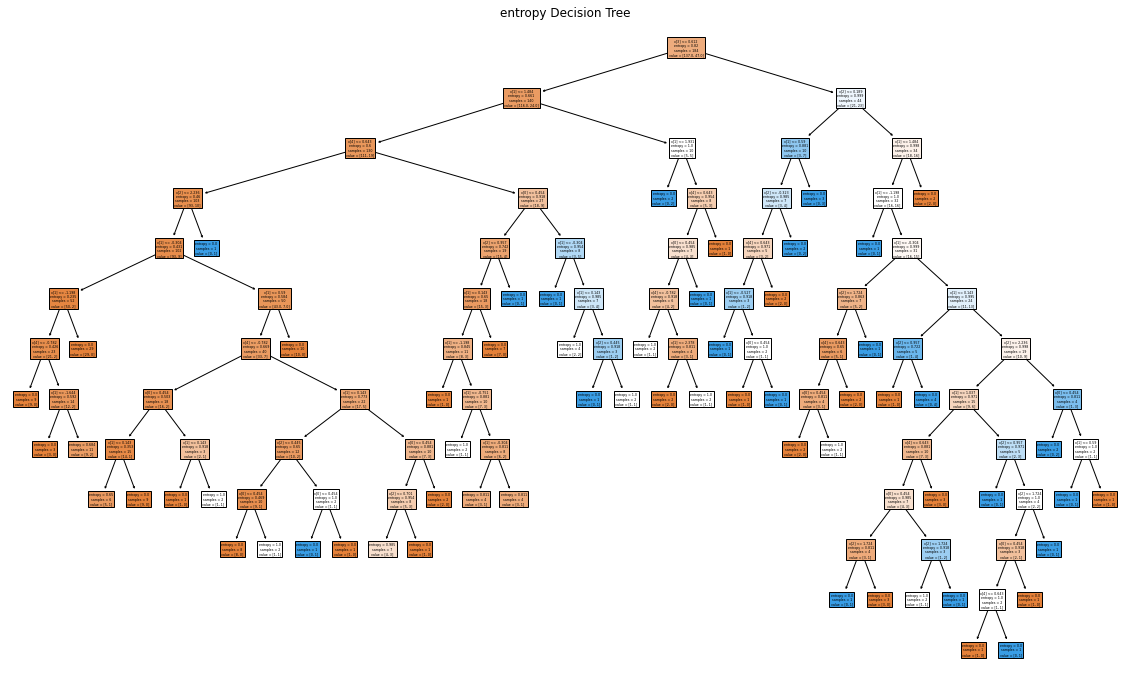

Training
              precision    recall  f1-score   support

           0       0.88      1.00      0.94       137
           1       1.00      0.62      0.76        47

    accuracy                           0.90       184
   macro avg       0.94      0.81      0.85       184
weighted avg       0.91      0.90      0.89       184

Testing
              precision    recall  f1-score   support

           0       0.82      0.95      0.88        65
           1       0.00      0.00      0.00        14

    accuracy                           0.78        79
   macro avg       0.41      0.48      0.44        79
weighted avg       0.67      0.78      0.72        79



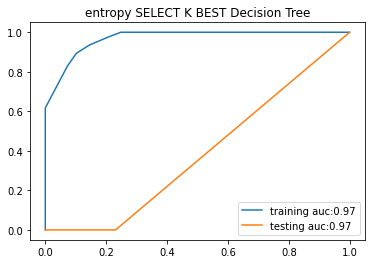

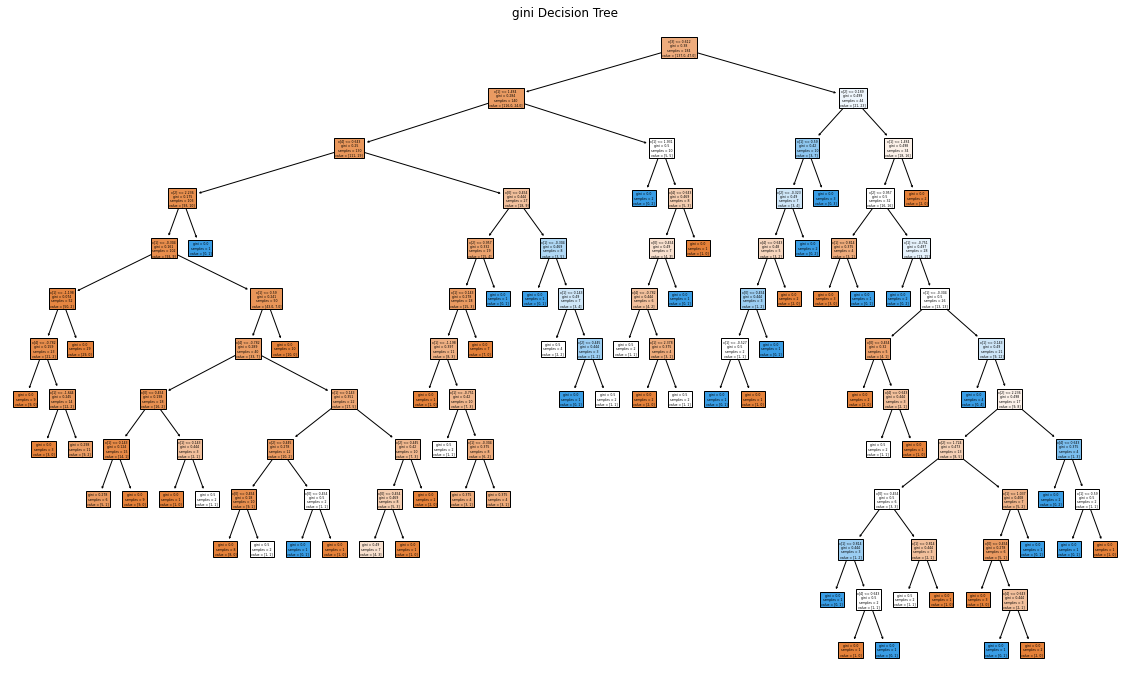

Training
              precision    recall  f1-score   support

           0       0.88      1.00      0.94       137
           1       1.00      0.62      0.76        47

    accuracy                           0.90       184
   macro avg       0.94      0.81      0.85       184
weighted avg       0.91      0.90      0.89       184

Testing
              precision    recall  f1-score   support

           0       0.82      0.95      0.88        65
           1       0.00      0.00      0.00        14

    accuracy                           0.78        79
   macro avg       0.41      0.48      0.44        79
weighted avg       0.67      0.78      0.72        79



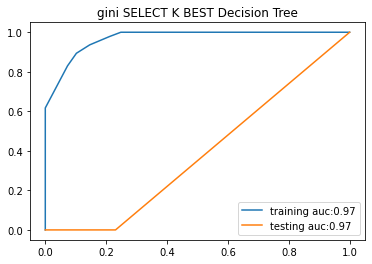

In [124]:
for i in ["entropy","gini"]:
    DecisionTree(x_train_select,x_test_select,y_train_select,y_test_select,"SELECT K BEST Decision Tree",i)

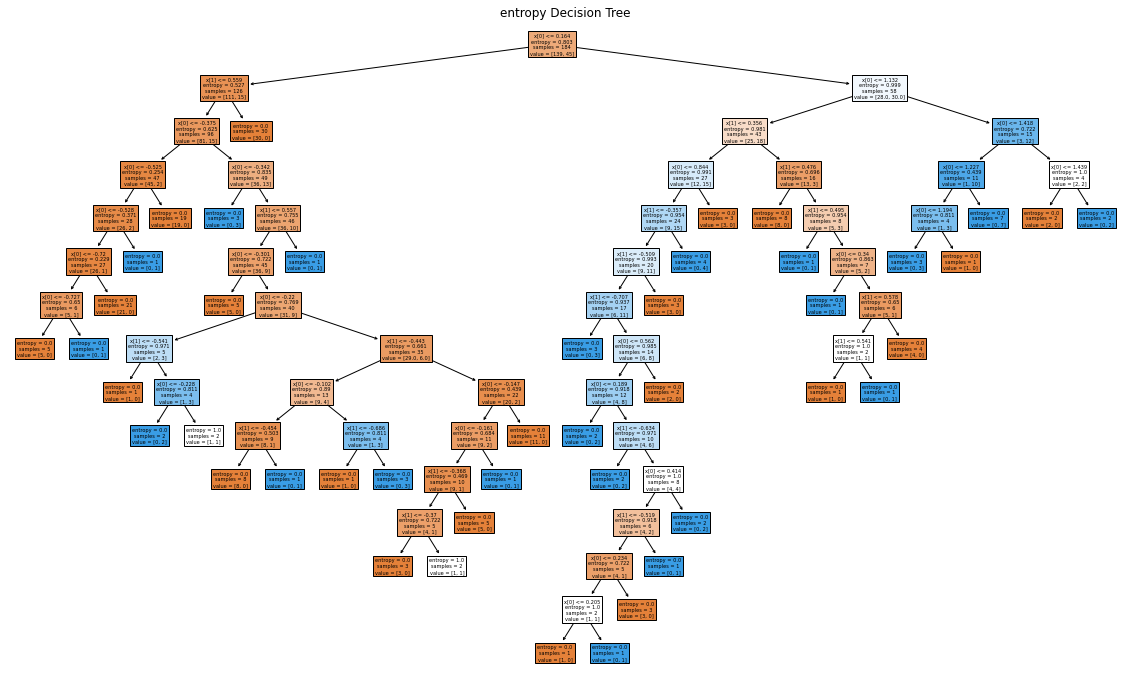

Training
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       139
           1       1.00      0.96      0.98        45

    accuracy                           0.99       184
   macro avg       0.99      0.98      0.99       184
weighted avg       0.99      0.99      0.99       184

Testing
              precision    recall  f1-score   support

           0       0.89      0.63      0.74        63
           1       0.32      0.69      0.44        16

    accuracy                           0.65        79
   macro avg       0.61      0.66      0.59        79
weighted avg       0.77      0.65      0.68        79



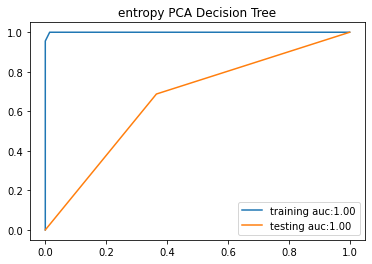

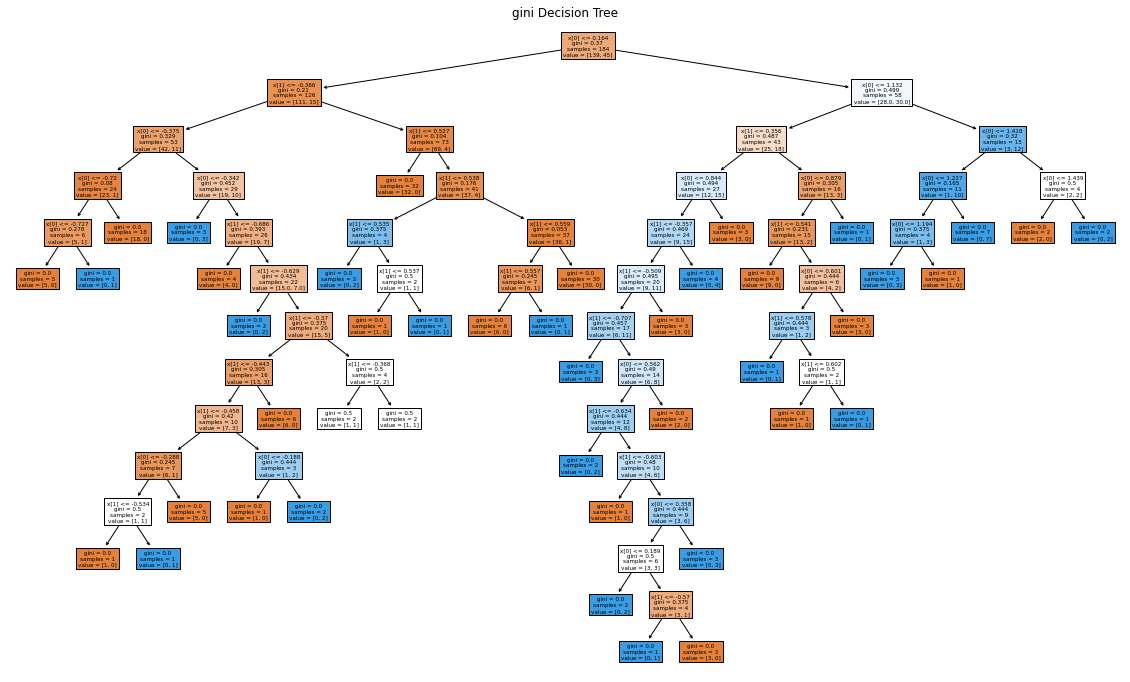

Training
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       139
           1       1.00      0.96      0.98        45

    accuracy                           0.99       184
   macro avg       0.99      0.98      0.99       184
weighted avg       0.99      0.99      0.99       184

Testing
              precision    recall  f1-score   support

           0       0.89      0.63      0.74        63
           1       0.32      0.69      0.44        16

    accuracy                           0.65        79
   macro avg       0.61      0.66      0.59        79
weighted avg       0.77      0.65      0.68        79



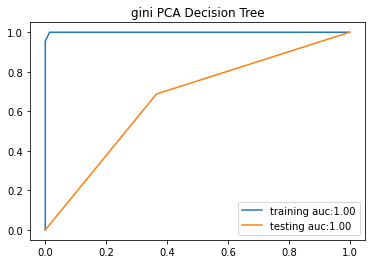

In [125]:
for i in ["entropy","gini"]:
    DecisionTree(x_train_pca,x_test_pca,y_train,y_test,"PCA Decision Tree",i)

In [126]:
def RandomForest(x_train,x_test,y_train,y_test,tit):
        model=RandomForestClassifier()
        y_train=lab.fit_transform(y_train)
        y_test=lab.fit_transform(y_test)
        model.fit(x_train,y_train)
        pred_train=model.predict(x_train)
        print("Training")
        print(classification_report(y_train,pred_train))
        
        pred_prob_train=model.predict_proba(x_train)[:,1]
        fpr,tpr,_=roc_curve(y_train,pred_prob_train)
        auc1=auc(fpr,tpr)
        plt.plot(fpr,tpr,label="training auc:%.2f"%auc1)
        
        pred_test=model.predict(x_test)
        print("Testing")
        print(classification_report(y_test,pred_test))
        
        pred_prob_test=model.predict_proba(x_test)[:,1]
        fpr,tpr,_=roc_curve(y_test,pred_prob_test)
        auc2=auc(fpr,tpr)
        plt.plot(fpr,tpr,label="testing auc:%.2f"%auc1)
        plt.title(tit)
        plt.legend()
        plt.show()    
    

Training
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       139
           1       1.00      0.96      0.98        45

    accuracy                           0.99       184
   macro avg       0.99      0.98      0.99       184
weighted avg       0.99      0.99      0.99       184

Testing
              precision    recall  f1-score   support

           0       0.84      0.76      0.80        63
           1       0.32      0.44      0.37        16

    accuracy                           0.70        79
   macro avg       0.58      0.60      0.58        79
weighted avg       0.74      0.70      0.71        79



C:\Users\Harish Kumar M V\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
C:\Users\Harish Kumar M V\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


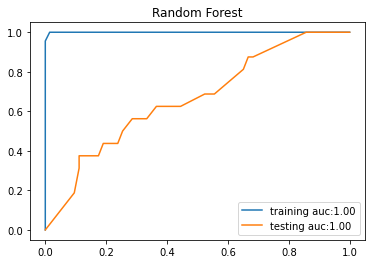

In [127]:
RandomForest(x_train,x_test,y_train,y_test,"Random Forest")

Training
              precision    recall  f1-score   support

           0       0.91      0.96      0.94       137
           1       0.87      0.72      0.79        47

    accuracy                           0.90       184
   macro avg       0.89      0.84      0.86       184
weighted avg       0.90      0.90      0.90       184

Testing
              precision    recall  f1-score   support

           0       0.85      0.95      0.90        65
           1       0.50      0.21      0.30        14

    accuracy                           0.82        79
   macro avg       0.67      0.58      0.60        79
weighted avg       0.79      0.82      0.79        79



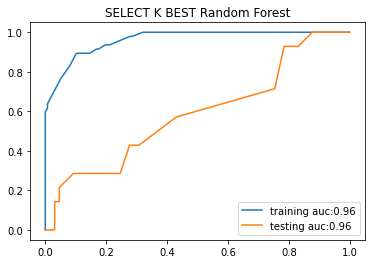

In [128]:
RandomForest(x_train_select,x_test_select,y_train_select,y_test_select,"SELECT K BEST Random Forest")

Training
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       139
           1       1.00      0.96      0.98        45

    accuracy                           0.99       184
   macro avg       0.99      0.98      0.99       184
weighted avg       0.99      0.99      0.99       184

Testing
              precision    recall  f1-score   support

           0       0.86      0.76      0.81        63
           1       0.35      0.50      0.41        16

    accuracy                           0.71        79
   macro avg       0.60      0.63      0.61        79
weighted avg       0.75      0.71      0.73        79



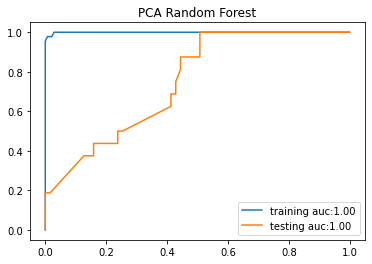

In [129]:
RandomForest(x_train_pca,x_test_pca,y_train,y_test,"PCA Random Forest")

In [130]:
def AdaBoost(x_train,x_test,y_train,y_test,tit):
        model=AdaBoostClassifier()
        y_train=lab.fit_transform(y_train)
        y_test=lab.fit_transform(y_test)
        model.fit(x_train,y_train)
        pred_train=model.predict(x_train)
        print("Training")
        print(classification_report(y_train,pred_train))
        
        pred_prob_train=model.predict_proba(x_train)[:,1]
        fpr,tpr,_=roc_curve(y_train,pred_prob_train)
        auc1=auc(fpr,tpr)
        plt.plot(fpr,tpr,label="training auc:%.2f"%auc1)
        
        pred_test=model.predict(x_test)
        print("Testing")
        print(classification_report(y_test,pred_test))
        
        pred_prob_test=model.predict_proba(x_test)[:,1]
        fpr,tpr,_=roc_curve(y_test,pred_prob_test)
        auc2=auc(fpr,tpr)
        plt.plot(fpr,tpr,label="testing auc:%.2f"%auc1)
        plt.title(tit)
        plt.legend()
        plt.show()    
    

C:\Users\Harish Kumar M V\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Harish Kumar M V\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but AdaBoostClassifier was fitted without feature names
  warnings.warn(
C:\Users\Harish Kumar M V\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Harish Kumar M V\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetri

Training
              precision    recall  f1-score   support

           0       0.84      0.94      0.89       139
           1       0.70      0.47      0.56        45

    accuracy                           0.82       184
   macro avg       0.77      0.70      0.72       184
weighted avg       0.81      0.82      0.81       184

Testing
              precision    recall  f1-score   support

           0       0.80      1.00      0.89        63
           1       0.00      0.00      0.00        16

    accuracy                           0.80        79
   macro avg       0.40      0.50      0.44        79
weighted avg       0.64      0.80      0.71        79



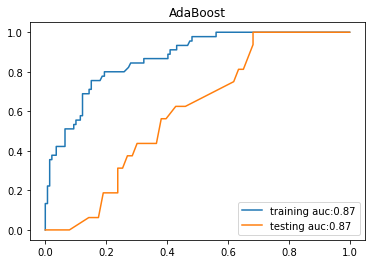

In [131]:
AdaBoost(x_train,x_test,y_train,y_test,"AdaBoost")

C:\Users\Harish Kumar M V\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Training
              precision    recall  f1-score   support

           0       0.78      0.93      0.85       137
           1       0.55      0.26      0.35        47

    accuracy                           0.76       184
   macro avg       0.66      0.59      0.60       184
weighted avg       0.72      0.76      0.72       184

Testing
              precision    recall  f1-score   support

           0       0.96      0.66      0.78        65
           1       0.35      0.86      0.50        14

    accuracy                           0.70        79
   macro avg       0.65      0.76      0.64        79
weighted avg       0.85      0.70      0.73        79



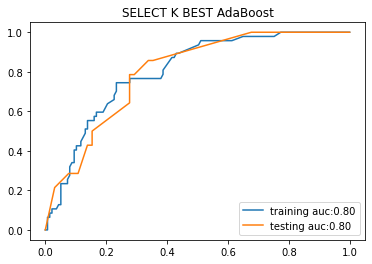

In [133]:
AdaBoost(x_train_select,x_test_select,y_train_select,y_test_select,"SELECT K BEST AdaBoost")

C:\Users\Harish Kumar M V\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Training
              precision    recall  f1-score   support

           0       0.92      0.97      0.95       139
           1       0.89      0.76      0.82        45

    accuracy                           0.92       184
   macro avg       0.91      0.86      0.88       184
weighted avg       0.92      0.92      0.92       184

Testing
              precision    recall  f1-score   support

           0       0.82      0.87      0.85        63
           1       0.33      0.25      0.29        16

    accuracy                           0.75        79
   macro avg       0.58      0.56      0.57        79
weighted avg       0.72      0.75      0.73        79



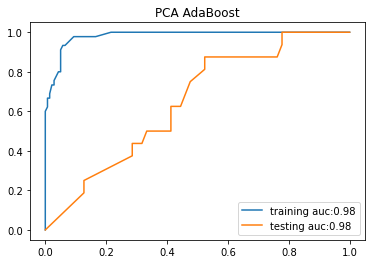

In [132]:
AdaBoost(x_train_pca,x_test_pca,y_train,y_test,"PCA AdaBoost")

In [134]:
def Bagging(x_train,x_test,y_train,y_test,tit):
        model=BaggingClassifier()
        y_train=lab.fit_transform(y_train)
        y_test=lab.fit_transform(y_test)
        model.fit(x_train,y_train)
        pred_train=model.predict(x_train)
        print("Training")
        print(classification_report(y_train,pred_train))
        
        pred_prob_train=model.predict_proba(x_train)[:,1]
        fpr,tpr,_=roc_curve(y_train,pred_prob_train)
        auc1=auc(fpr,tpr)
        plt.plot(fpr,tpr,label="training auc:%.2f"%auc1)
        
        pred_test=model.predict(x_test)
        print("Testing")
        print(classification_report(y_test,pred_test))
        
        pred_prob_test=model.predict_proba(x_test)[:,1]
        fpr,tpr,_=roc_curve(y_test,pred_prob_test)
        auc2=auc(fpr,tpr)
        plt.plot(fpr,tpr,label="testing auc:%.2f"%auc1)
        plt.title(tit)
        plt.legend()
        plt.show()    
    

Training
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       139
           1       1.00      0.87      0.93        45

    accuracy                           0.97       184
   macro avg       0.98      0.93      0.95       184
weighted avg       0.97      0.97      0.97       184

Testing
              precision    recall  f1-score   support

           0       0.81      0.73      0.77        63
           1       0.23      0.31      0.26        16

    accuracy                           0.65        79
   macro avg       0.52      0.52      0.51        79
weighted avg       0.69      0.65      0.66        79



C:\Users\Harish Kumar M V\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but BaggingClassifier was fitted without feature names
  warnings.warn(
C:\Users\Harish Kumar M V\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but BaggingClassifier was fitted without feature names
  warnings.warn(


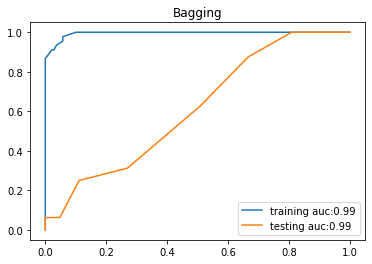

In [135]:
Bagging(x_train,x_test,y_train,y_test,"Bagging")

Training
              precision    recall  f1-score   support

           0       0.89      0.98      0.93       137
           1       0.91      0.66      0.77        47

    accuracy                           0.90       184
   macro avg       0.90      0.82      0.85       184
weighted avg       0.90      0.90      0.89       184

Testing
              precision    recall  f1-score   support

           0       0.82      0.98      0.90        65
           1       0.00      0.00      0.00        14

    accuracy                           0.81        79
   macro avg       0.41      0.49      0.45        79
weighted avg       0.68      0.81      0.74        79



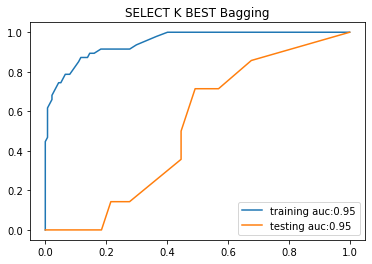

In [136]:
Bagging(x_train_select,x_test_select,y_train_select,y_test_select,"SELECT K BEST Bagging")

Training
              precision    recall  f1-score   support

           0       0.97      0.98      0.97       139
           1       0.93      0.91      0.92        45

    accuracy                           0.96       184
   macro avg       0.95      0.94      0.95       184
weighted avg       0.96      0.96      0.96       184

Testing
              precision    recall  f1-score   support

           0       0.85      0.62      0.72        63
           1       0.27      0.56      0.37        16

    accuracy                           0.61        79
   macro avg       0.56      0.59      0.54        79
weighted avg       0.73      0.61      0.65        79



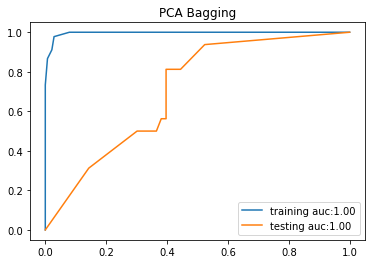

In [137]:
Bagging(x_train_pca,x_test_pca,y_train,y_test,"PCA Bagging")

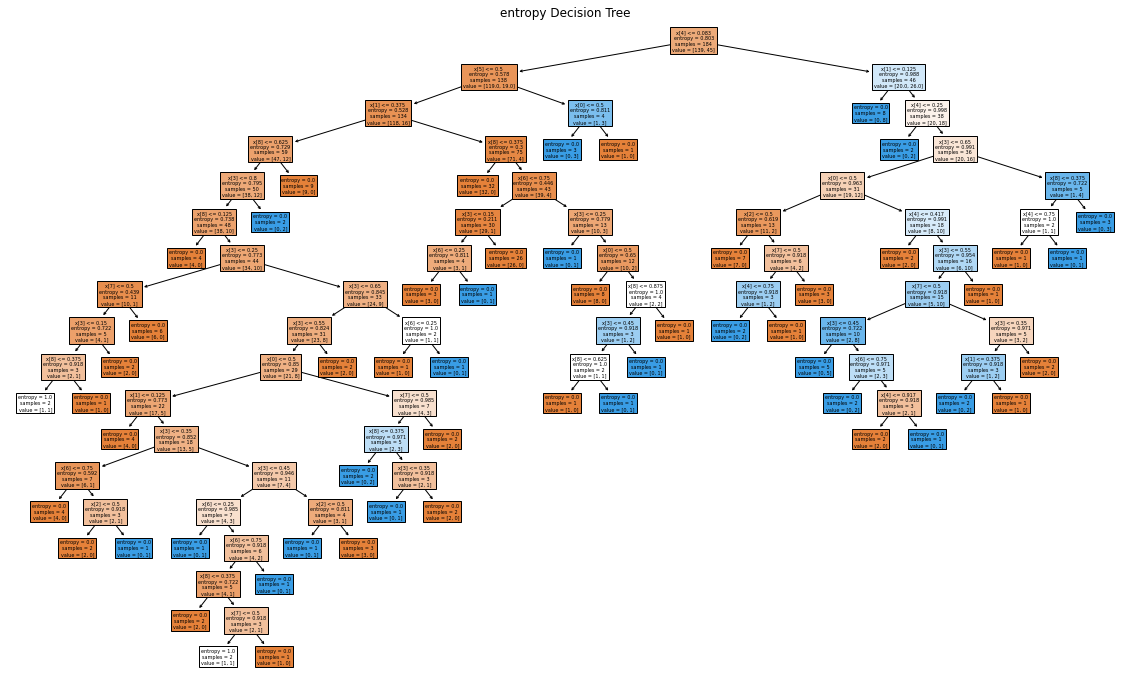

Training
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       139
           1       1.00      0.96      0.98        45

    accuracy                           0.99       184
   macro avg       0.99      0.98      0.99       184
weighted avg       0.99      0.99      0.99       184

Testing
              precision    recall  f1-score   support

           0       0.83      0.71      0.77        63
           1       0.28      0.44      0.34        16

    accuracy                           0.66        79
   macro avg       0.56      0.58      0.56        79
weighted avg       0.72      0.66      0.68        79



C:\Users\Harish Kumar M V\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
C:\Users\Harish Kumar M V\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


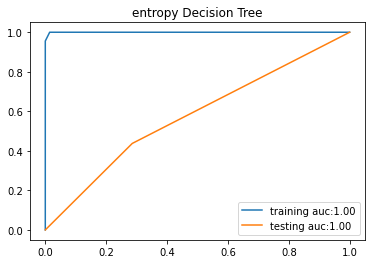

cross validation training results:  [0.98639456 1.         0.99319728 0.98639456 0.99324324]
cross validation testing results:  [0.78378378 0.64864865 0.72972973 0.72972973 0.61111111]


In [142]:
        tit="Decision Tree"
        i="entropy"
        model=DecisionTreeClassifier(criterion=i)
        y_train=lab.fit_transform(y_train)
        y_test=lab.fit_transform(y_test)
        model.fit(x_train,y_train)
        plt.figure(figsize=(20,12))
        tree.plot_tree(model,filled=True)
        plt.title(i+" Decision Tree")
        plt.show()
        pred_train=model.predict(x_train)
        print("Training")
        print(classification_report(y_train,pred_train))
        
        pred_prob_train=model.predict_proba(x_train)[:,1]
        fpr,tpr,_=roc_curve(y_train,pred_prob_train)
        auc1=auc(fpr,tpr)
        plt.plot(fpr,tpr,label="training auc:%.2f"%auc1)
        
        pred_test=model.predict(x_test)
        print("Testing")
        print(classification_report(y_test,pred_test))
        
        pred_prob_test=model.predict_proba(x_test)[:,1]
        fpr,tpr,_=roc_curve(y_test,pred_prob_test)
        auc2=auc(fpr,tpr)
        plt.plot(fpr,tpr,label="testing auc:%.2f"%auc1)
        plt.title(i+" "+tit)
        plt.legend()
        plt.show()   


        from sklearn.model_selection import cross_validate,KFold
        kf=KFold(5)
        cross_val_results=cross_validate(model,x_train,y_train,cv=kf,return_train_score=True)
        print("cross validation training results: ",cross_val_results["train_score"])
        print("cross validation testing results: ",cross_val_results["test_score"])

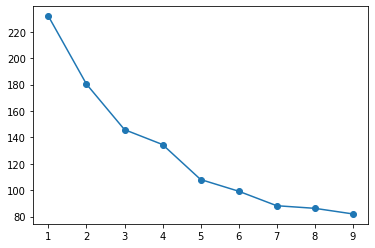

In [145]:
inertia=[]
k=range(1,10)
for i in k:
    model=KMeans(n_clusters=i)
    model.fit(x_train,y_train)
    inertia.append(model.inertia_)
plt.plot(k,inertia,"-o")
plt.show()

In [149]:
from sklearn.metrics import silhouette_score
def kmeans(x_train,y_train):
    model=KMeans(n_clusters=3)
    model.fit(x_train,y_train)
    print("Inertia:",model.inertia_)
    print("Silhouette Score:",silhouette_score(x_train,model.labels_))

In [153]:
print("kmeans")
kmeans(x_train,y_train)

kmeans
Inertia: 145.84655607906868
Silhouette Score: 0.24827074547412273


In [154]:
print("Select k best kmeans")
kmeans(x_train_select,y_train_select)

Select k best kmeans
Inertia: 483.9667309620149
Silhouette Score: 0.3514610640337143


In [155]:
print("PCA kmeans")
kmeans(x_train_pca,y_train)

PCA kmeans
Inertia: 31.722149766203824
Silhouette Score: 0.5438210249162599


Inertia: 145.84655607906868
Silhouette Score: 0.24827074547412273


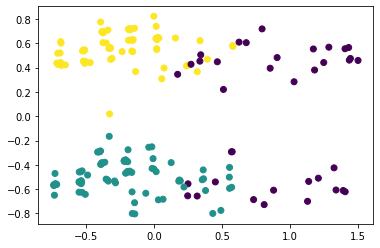

In [162]:
model=KMeans(n_clusters=3)
model.fit(x_train,y_train)
print("Inertia:",model.inertia_)
print("Silhouette Score:",silhouette_score(x_train,model.labels_))
plt.scatter(x_train_pca[:,0],x_train_pca[:,1],c=model.labels_,cmap="viridis")
plt.show()

In [165]:
x.columns

Index(['Class', 'age', 'manapause', 'tumor-size', 'inv-nodes', 'node-caps',
       'deg-malig', 'breast', 'breast-quad'],
      dtype='object')

In [169]:
xlr=x[['Class', 'age', 'manapause', 'tumor-size', 'inv-nodes', 'node-caps', 'breast', 'breast-quad']]
xlr

,Class,age,manapause,tumor-size,inv-nodes,node-caps,breast,breast-quad
0,0,1,2,5,0,0,0,1
1,0,2,2,3,0,0,1,4
2,0,2,2,3,0,0,0,1
3,0,4,0,2,0,0,1,2
4,0,2,2,0,0,0,1,3
...,...,...,...,...,...,...,...,...
281,1,1,2,5,0,0,0,2
282,1,1,2,3,0,0,0,2
283,1,4,0,3,0,0,1,2
284,1,2,0,5,4,0,0,1


In [170]:
ylr=x['deg-malig']
ylr

0      2
1      1
2      1
3      1
4      1
      ..
281    1
282    2
283    0
284    2
285    2
Name: deg-malig, Length: 263, dtype: int64

In [203]:
xlr_select=SelectKBest(f_classif,k=5).fit_transform(xlr,ylr)
ylr_select=ylr
pca=PCA(n_components=2)
xlr_pca=pca.fit_transform(xlr)
xlr_train,xlr_test,ylr_train,ylr_test=train_test_split(xlr,ylr,test_size=0.3)
xlr_train_select,xlr_test_select,ylr_train_select,ylr_test_select=train_test_split(xlr_select,ylr_select,test_size=0.3)
xlr_train=stand.fit_transform(xlr_train)
xlr_train=min.fit_transform(xlr_train)
xlr_train_select=stand.fit_transform(xlr_train_select)
xlr_train_select=stand.fit_transform(xlr_train_select)
xlr_train_pca=pca.fit_transform(xlr_train)
xlr_test_pca=pca.fit_transform(xlr_test)

In [199]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def linear_regression(xlr_train, xlr_test, ylr_train, ylr_test, i):
    model = LinearRegression()
    model.fit(xlr_train, ylr_train)  # Fit the model with training data
    
    # Predictions on the training data
    train_pred = model.predict(xlr_train)
    
    # Predictions on the test data
    test_pred = model.predict(xlr_test)
    
    print(f"{i} - Training Set")
    print("MSE: ", mean_squared_error(ylr_train, train_pred))
    print("MAE: ", mean_absolute_error(ylr_train, train_pred))
    print("RMSE: ", np.sqrt(mean_squared_error(ylr_train, train_pred)))
    print("R2 SCORE: ", r2_score(ylr_train, train_pred))
    
    print(f"{i} - Test Set")
    print("MSE: ", mean_squared_error(ylr_test, test_pred))
    print("MAE: ", mean_absolute_error(ylr_test, test_pred))
    print("RMSE: ", np.sqrt(mean_squared_error(ylr_test, test_pred)))
    print("R2 SCORE: ", r2_score(ylr_test, test_pred))

# Example usage (make sure xlr_train_select, xlr_test_select, ylr_train_select, ylr_test_select are defined and have the same number of features)
linear_regression(xlr_train_select, xlr_test_select, ylr_train_select, ylr_test_select, "Select K Best Linear Regression")


Select K Best Linear Regression - Training Set
MSE:  0.4212346246561346
MAE:  0.5317916710127911
RMSE:  0.6490259044569289
R2 SCORE:  0.1573316324534334
Select K Best Linear Regression - Test Set
MSE:  0.5012632022137449
MAE:  0.5974001831874308
RMSE:  0.7079994365914035
R2 SCORE:  0.1152761184909552


In [200]:
linear_regression(xlr_train,xlr_test,ylr_train,ylr_test,"Linear Regression")

Linear Regression - Training Set
MSE:  0.422773249449147
MAE:  0.5195636158553711
RMSE:  0.6502101579098462
R2 SCORE:  0.15664558488390767
Linear Regression - Test Set
MSE:  4.156366996862465
MAE:  1.8116184577366548
RMSE:  2.038716997737171
R2 SCORE:  -6.1381085380898845


C:\Users\Harish Kumar M V\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [201]:
linear_regression(xlr_train_select,xlr_test_select,ylr_train_select,ylr_test_select,"Select K Best Linear Regression")

Select K Best Linear Regression - Training Set
MSE:  0.4212346246561346
MAE:  0.5317916710127911
RMSE:  0.6490259044569289
R2 SCORE:  0.1573316324534334
Select K Best Linear Regression - Test Set
MSE:  0.5012632022137449
MAE:  0.5974001831874308
RMSE:  0.7079994365914035
R2 SCORE:  0.1152761184909552


In [204]:
linear_regression(xlr_train_pca,xlr_test_pca,ylr_train,ylr_test,"PCA Linear Regression")

PCA Linear Regression - Training Set
MSE:  0.42522308215108234
MAE:  0.5230969685285782
RMSE:  0.6520913142736088
R2 SCORE:  0.19694579855485905
PCA Linear Regression - Test Set
MSE:  1.8256959903505652
MAE:  1.1202473749447366
RMSE:  1.3511831816413957
R2 SCORE:  -2.518890881957344
